In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### Fórmula de Bhaskara

$$ x = {-b \pm \sqrt {b^2 - 4 a c} \over 2a} $$

$$ i = \sqrt {-1} $$

In [2]:
def bhaskara(a, b, c):
    
    delta = b**2 - 4*a*c          
    x1 = round( (-b + delta**0.5)/2/a, 2)
    x2 = round( (-b - delta**0.5)/2/a, 2)
        
    if delta >= 0:        
        if delta > 0:
            return x1, x2
        else:
            return x1
    else:
        return x1.real, x1.imag, x2.real, x2.imag     
        
bhaskara(1, 2, 0)
#p/ criar um nº complexo, é só colocar um 'j' depois dele.

(0.0, -2.0)

### Derivadas de 1º Ordem

$$ {df \over dt} = \lim_{h \to 0} {f(t+h) - f(t) \over h} $$

(-1.3, 5.3)

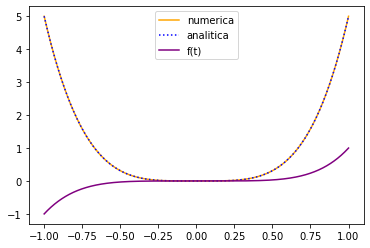

In [22]:
def contrario(ts):
    ts_contrarios = []
    for i in range(len(ts)):
        ts_contrarios.append(ts[-i-1])
    return ts_contrarios

def f(x):
    return x**5

def derivada_f(x):
    return 5*x**4

def derivada_pontual(f, t, h):
    dfdt = (f(t+h)-f(t))/h
    return dfdt

def varias_derivadas(f, ts):
    
    dfdts = []
    for i in range(len(ts)-1):
        dfdt = (f(ts[i+1]) - f(ts[i]))/(ts[i+1] - ts[i])
        dfdts.append(dfdt)
        
    return dfdts

ts = contrario([-x/10000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 10001)]
sol_numerica = varias_derivadas(f, ts)
sol_analitica = list(map(derivada_f, ts[:-1]))
funcao = list(map(f, ts[:-1]))


#dica: crie suas funções lambda e procure soluções analíticas p/ elas na web. 
#Compare a analítica com a derivada numérica da função.
#brinque de dar zoom e compare as soluções númerica e analítica.

plt.plot(ts[:-1], sol_numerica, c = 'orange')
plt.plot(ts[:-1], sol_analitica, 'b:')
plt.plot(ts[:-1], funcao, c = 'purple')
plt.legend(('numerica', 'analitica', 'f(t)'))
plt.xlim(None, None)
plt.ylim(None, None)

### Derivada de Ordem n:

$$ {f^n(t)} = {\lim _{h \to 0}} {f^{n-1}(t+h) - f^{n-1}(t) \over h}$$

$$ {f^n(t)} = {\lim _{h \to 0}} {1 \over h^n} \sum_{k=0}^{n} (-1)^{k+n} {n \choose k} f(t+kh) $$

*Ao calcular uma derivada de ordem muito alta, lembre-se do erro associado ao ponto flutuante.
Observe a fórmula acima e veja que o termo infinitesimal está sendo potencializado pela ordem.Para ordens superiores, não é difícil entender que a função vai explodir, porque o seu computador só entende a pequenez do passo infinitesimal até certo ponto. Se usar ordens muito altas for necessário, lembre-se de aumentar o valor do passo, para tornar a explosão mais lenta; mas lembre-se que aumentar o passo é diminuir a precisão. Veja este artigo de [Diferenciação Numérica, na Wikipedia](https://en.wikipedia.org/wiki/Numerical_differentiation).* 

*A segunda fórmula é parcialmente deduzida [aqui](https://math.stackexchange.com/questions/702185/definition-of-the-nth-derivative-first-post). O primeiro link aponta uma dedução neste [livro](https://www.google.com/search?q=Shilov%2C+George.+Elementary+Real+and+Complex+Analysis.&oq=Shilov%2C+George.+Elementary+Real+and+Complex+Analysis.&aqs=chrome.0.69i59.376j0j9&sourceid=chrome&ie=UTF-8).

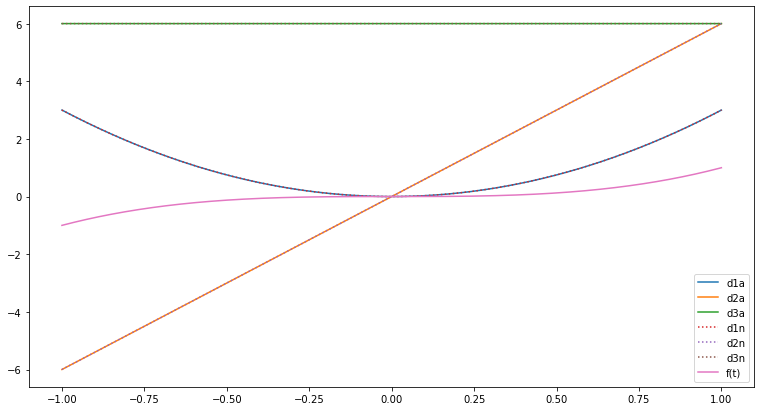

In [4]:
def derivada_n(f, t, h, n):
    
    if n == 0:
        return f(t)
    else:      
        if n == 1:
            return (f(t+h)-f(t))/h    
        else:
            dndt = (derivada_n(f, t+h, h, n-1) - derivada_n(f, t, h, n-1))/h
            return dndt
    
def derivadas_n(f, ts, n):
    derivadas = []
    for i in range(len(ts)-1):
        h = ts[i+1] - ts[i]
        dfdt = derivada_n(f, ts[i], h, n)
        derivadas.append(dfdt)
    return derivadas

ts = contrario([-x/10000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 10001)]
f = lambda x: x**3
d1fa = lambda x: 3*x**2
d2fa = lambda x: 6*x
d3fa = lambda x: 6

# a = sol. analítica, n = sol. numérica

fs = list(map(f, ts[:-1]))
d1fas = list(map(d1fa, ts[:-1]))
d2fas = list(map(d2fa, ts[:-1]))
d3fas = list(map(d3fa, ts[:-1]))
d1fns = derivadas_n(f, ts, 1)
d2fns = derivadas_n(f, ts, 2)
d3fns = derivadas_n(f, ts, 3)

fig = plt.figure(figsize = (13, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts[:-1], d1fas)
grafico.plot(ts[:-1], d2fas)
grafico.plot(ts[:-1], d3fas)
grafico.plot(ts[:-1], d1fns, ':')
grafico.plot(ts[:-1], d2fns, ':')
grafico.plot(ts[:-1], d3fns, ':')
grafico.plot(ts[:-1], fs)
grafico.legend(('d1a', 'd2a', 'd3a', 'd1n', 'd2n', 'd3n', 'f(t)'))

### Série de Taylor:

$$ f(t) = f(a) + f'(a)(t - a) + {f''(a)(t - a)^2 \over 2!}+ \ldots + {f^{\infty}(a)(t - a)^\infty \over \infty !} $$

$$ f(t) = \sum_{n = 0}^{\infty} {f^n(a)(t - a)^n \over n!} $$

$$ 0! = 1 $$

*Atente para o problema do passo infinitesimal descrito para as derivadas, na hora de decidir o melhor ponto de truncamento. A irônia é que querer precisão demais pode render um resultado absurdo. 
Um jeito relativamente simples de achar o truncamento ótimo é observar a convergência dos valores.*

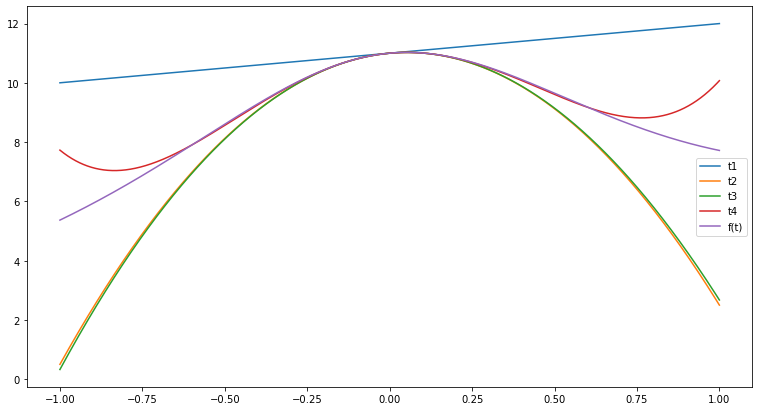

In [76]:
def fatorial(i):
    assert type(i) == int
    if i == 0 or i == 1:
        return 1
    else:
        return i*fatorial(i-1)
    
def taylor(f, t, a, h, n): #função, argumento, ponto de referência, passo infinitesimal, ordem do truncamento
    ftaylor = 0
    for i in range(n+1):
        ftaylor += derivada_n(f, a, h, i)*(t-a)**i/fatorial(i)        
    return ftaylor

def taylors(f, ts, a, n):
    ftaylors = []
    for i in range(len(ts)-1):
        h = ts[i+1] - ts[i]
        ftaylor = taylor(f, ts[i], a, h, n)
        ftaylors.append(ftaylor)
    return ftaylors

ts = contrario([-x/10000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 10001)]
f = lambda x: np.e**x + 1/(0.1+0.1*x**2)
ft1s = taylors(f, ts, 0, 1)
ft2s = taylors(f, ts, 0, 2)
ft3s = taylors(f, ts, 0, 3)
ft4s = taylors(f, ts, 0, 4)
fs = list(map(f, ts[:-1]))

fig = plt.figure(figsize = (13, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts[:-1], ft1s)
grafico.plot(ts[:-1], ft2s)
grafico.plot(ts[:-1], ft3s)
grafico.plot(ts[:-1], ft4s)
grafico.plot(ts[:-1], fs)
grafico.legend(('t1', 't2', 't3', 't4', 'f(t)'))

$$ \int_{a}^{b} f(t)dt = \sum_{n=1}^{{b-a \over dt} = \infty} f(a+ndt) \cdot dt = \lim_{h \to 0} \sum_{n=1}^{{b-a \over h}} f(a+nh) \cdot h $$

Para o caso em que $\phi (u, v) = f(u)g(v)$:

$$ \int_{a_2}^{b_2} \int_{a_1}^{b_1} f(u)g(v) dudv =
\lim_{h_1 \to 0} \Bigg (\sum_{n=1}^{{b_1-a_1 \over h_1}} f(a_1+nh_1) \cdot h_1 \Bigg) \cdot
\lim_{h_2 \to 0} \Bigg (\sum_{m=1}^{{b_2-a_2 \over h_2}} f(a_2+mh_2) \cdot h_2 \Bigg)
$$

In [6]:
f = lambda u: u**2
g = lambda v: np.sin(np.pi*v)

def integral(f, a, b, h):
    
    n = int(round(b-a)/h)
    integral = 0
    for i in range(1, n+1):
        integral += f(a+ i*h) * h
    return integral

integral(f, 1, 2, 0.00001)

def integral_dupla(f, a1, b1, h1,
                   g, a2, b2, h2):
    
    return integral(f, a1, b1, h1)*integral(g, a2, b2, h2)

integral_dupla(f, 0, 1, 0.0001, g, 0, np.pi, 0.0001)

0.2122384210932534

[Método de Euler](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Euler) explícito para resolver um problema de valor inicial (PVI):

$$ y'(t) = f(t, y) $$  
$$ y_{_0}(t) = t_{_0} $$  
$$ y_{n+1} = y_n + \Delta y $$  
$$ \Delta y = \lim_{\Delta t \to 0} y'(t) \Delta t = \lim_{\Delta t \to 0} f(t, y) \Delta t $$  
$$ y_{n+1} \approx y_n + f(t, y) \cdot \Delta t $$

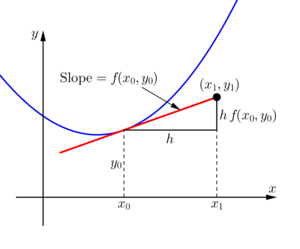

[Método Runge-Kutta](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta) 4º ordem para resolver um problema de valor inicial (PVI):

- Se f for apenas função de t, você pode resolver derivando normalmente.

$$ y'(t) = f(t, y)$$  
$$y_{_0}(t) = t_{_0}$$   
$$y_{n+1} = y_n + {h \over 6}(k_1 + 2k_2 + 2k_3 + k_4)$$  
$$k_1 = f(t_n, y_n)$$  
$$k_2 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_1 \Bigg) $$  
$$k_3 = f \Bigg (t_n + {h \over 2}, y_n + {h \over 2} k_2 \Bigg) $$  
$$k_4 = f (t_n + h, y_n + h k_3) $$

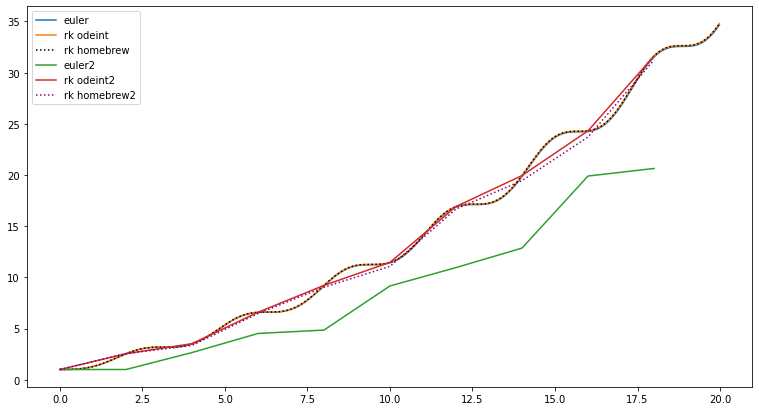

In [71]:
ts = contrario([-x/10000 for x in range(1, 10001)]) + [x/10000 for x in range(1, 10001)]
ts2 = [x/50 for x in range (1000)]
ts3 = [x/0.5 for x in range (10)]
f = lambda t, y: np.sin(t)**2*y**0.5

def eulerexplicito(f, y0, ts): #explícito significa que o próprio y_n+1 não depende dele mesmo em f(t, y).
    ys = [y0]
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]
        y = ys[i-1] + f(ts[i-1], ys[i-1])*h
        ys.append(y)
    return ys    
    
def rungekutta(f, y0, ts):   
    ys = [y0]
    for i in range(1, len(ts)):
        h = ts[i] - ts[i-1]        
        k1 = f(ts[i-1], ys[i-1]) # note a semelhança com o Euler explícito
        k2 = f(ts[i-1] + h/2, ys[i-1] + h*k1/2)
        k3 = f(ts[i-1] + h/2, ys[i-1] + h*k2/2)
        k4 = f(ts[i-1] + h, ys[i-1] + h*k3)
        
        y = ys[i-1] + h/6*(k1 + 2*k2 + 2*k3 + k4)
        ys.append(y)
    
    return ys

#note que nenhum dos métodos usa ts[n], porque isso iria servir p/
#prever y[n+1] e as listas ficariam com tamanhos diferentes. 

euler = eulerexplicito(f, 1, ts2)
rkodeint = odeint(f, 1, ts2, tfirst = True)
rkhomebrew = rungekutta(f, 1, ts2)
euler2 = eulerexplicito(f, 1, ts3)
rkodeint2 = odeint(f, 1, ts3, tfirst = True)
rkhomebrew2 = rungekutta(f, 1, ts3)

fig = plt.figure(figsize = (13, 7))
grafico = fig.add_subplot(1, 1, 1)
grafico.plot(ts2, euler)
grafico.plot(ts2, rkodeint)
grafico.plot(ts2, rkhomebrew, ':', c = 'black')
grafico.plot(ts3, euler2)
grafico.plot(ts3, rkodeint2)
grafico.plot(ts3, rkhomebrew2, ':', c = 'purple')
grafico.legend(('euler', 'rk odeint', 'rk homebrew', 'euler2', 'rk odeint2', 'rk homebrew2'))